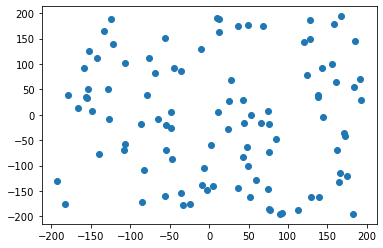

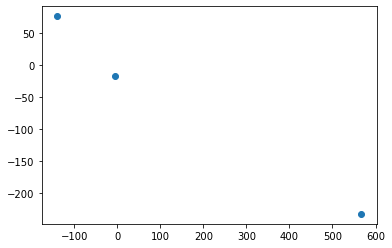

40 1.7320508075688774
340 3.16227766016838
620 3.7416573867739418


In [2]:
import math
import matplotlib.pyplot as plt
import random

class Vector(object):
    def __init__(self, x = 0, y = 0):
        self.x = x
        self.y = y
        self.magnitude = math.sqrt(self.x**2 + self.y**2)
        
    def subtract(self, other):
        return Vector(self.x - other.x, self.y - other.y)
    
    def divide(self, num):
        return Vector(self.x / num, self.y / num)
    
    def add(self, other):
        return Vector(self.x + other.x, self.y + other.y)
    
    def multiply(self, num):
        return Vector(self.x * num, self.y * num)
    
    def __str__(self):
        return '(' + str(self.x) +', ' + str(self.y) + ')'

    
class Particle(object):
    def __init__(self, mass, radius = 1, position = Vector(), velocity = Vector(), acceleration = Vector()):
        self.position = position
        self.previous_position = position
        self.velocity = velocity
        self.acceleration = acceleration
        self.mass = mass
        self.radius = radius
        self.centroid = None
        
    def get_acceleration(self, other):
        G = 3.67*10**-11
        distance = other.previous_position.subtract(self.position)
        # Calculates a distance
        r = distance.magnitude
        if 0.0 < r < self.radius + other.radius:
            return None
        if r == 0.0:
            return Vector()
        F_magnitude = G*other.mass/r**2 
        return distance.divide(r).multiply(F_magnitude)

    def update_acceleration(self, interacting_set):
        for element in interacting_set:
            if element == self:
                return
            new_interaction = self.get_acceleration(element)
            if new_interaction == None:
                self.velocity = element.velocity.multiply(element.mass).add(self.velocity.multiply(self.mass)).divide((self.mass + element.mass))
                if self.mass >= element.mass:
                    self.mass += element.mass
                else:
                    self.mass += element.mass
                    self.radius = math.sqrt(element.radius**2 + self.radius**2)
                    self.position = element.position
                    self.acceleration = element.acceleration
                interacting_set.remove(element)
            else:
                self.acceleration = self.acceleration.add(new_interaction)
    
    def update_velocity(self, time_interval):
        self.velocity = self.velocity.add(self.acceleration.multiply(time_interval))
    
    def get_interacting_set(self, centroids, particles):
        interacting_set = []
        for i in range(len(centroids)):
            if self.centroid != centroids[i]:
                interacting_set.append(centroid[i])
        for i in range(len(particles)):
            if particles[i].centroid == self.centroid:
                interacting_set.append(centroid[i])
        return interacting_set
                
    def update_position(self, time_interval, interacting_set):
        self.previous_position = self.position
        self.update_acceleration(interacting_set)
        self.update_velocity(time_interval)
        self.position = self.position.add(self.velocity.multiply(time_interval))

def n_body_sim(num_particles):
    particles = []
    mass = 10
    radius = 200
    for i in range(num_particles):
        position = Vector(random.randint(-radius,radius), random.randint(-radius,radius))
        velocity = position.multiply(-0.25)
        particles.append(Particle(mass, position = position, velocity = velocity))
    tmax = 200
    first_and_last(tmax, particles, radius)
    #every_time(tmax, particles, radius)
    for i in range(len(particles)):
        print(particles[i].mass, particles[i].radius)

def first_and_last(tmax, particles, radius):
    for t in range(tmax + 1):
        X_values = []
        Y_values = []
        i = 0
        while i < len(particles):
            element = particles[i]
            element.update_position(0.1, particles)
            if tmax == t or t == 0:
                X_values.append(element.position.x)
                Y_values.append(element.position.y)
            i += 1
        if tmax == t or t == 0:
            plt.scatter(X_values, Y_values)
            plt.show()

def every_time(tmax, particles, radius):
    for t in range(tmax + 1):
        X_values = []
        Y_values = []
        i = 0
        while i < len(particles):
            element = particles[i]
            element.update_position(0.1, particles)
            X_values.append(element.position.x)
            Y_values.append(element.position.y)
            i += 1
        plt.scatter(X_values, Y_values)
        plt.show()
        

n_body_sim(100)

In [ ]:
# k means or another clustering algo
def k_means(particles, num_centroids):
    # Input all particles, recluster all particles
    # Particles outside of one's cluster are not in interacting set.
    return